In [ ]:
import numpy as np
from keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb

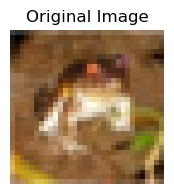

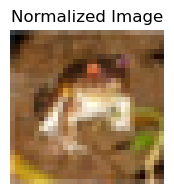

In [1]:
# Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

# Normalize pixel values
X_train_normalized = X_train / 255.0
X_test_normalized = X_test / 255.0

# Before normalization
plt.figure(figsize=(2, 2))
plt.imshow(X_train[0])
plt.title('Original Image')
plt.axis('off')
plt.show()

# After normalization
plt.figure(figsize=(2, 2))
plt.imshow(X_train_normalized[0])
plt.title('Normalized Image')
plt.axis('off')
plt.show()

In [2]:
# Flatten images
X_train_flattened = X_train_normalized.reshape(X_train_normalized.shape[0], -1)
X_test_flattened = X_test_normalized.reshape(X_test_normalized.shape[0], -1)

# Display the shape of the flattened data
print("Shape of X_train_flattened:", X_train_flattened.shape)
print("Shape of X_test_flattened:", X_test_flattened.shape)

Shape of X_train_flattened: (50000, 3072)
Shape of X_test_flattened: (10000, 3072)


In [3]:
# Define new dimensions for resizing
new_height = 64
new_width = 64

# Resize training images
X_train_resized = np.array([resize(img, (new_height, new_width)) for img in X_train_normalized])

# Resize test images
X_test_resized = np.array([resize(img, (new_height, new_width)) for img in X_test_normalized])

# Display the shape of the resized data
print("Shape of X_train_resized:", X_train_resized.shape)
print("Shape of X_test_resized:", X_test_resized.shape)

Shape of X_train_resized: (50000, 64, 64, 3)
Shape of X_test_resized: (10000, 64, 64, 3)


In [4]:
# Split the dataset into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_resized, y_train, test_size=0.2, random_state=42)

# Display the shapes of the split datasets
print("Shape of X_train_split:", X_train_split.shape)
print("Shape of X_val_split:", X_val_split.shape)
print("Shape of y_train_split:", y_train_split.shape)
print("Shape of y_val_split:", y_val_split.shape)

Shape of X_train_split: (40000, 64, 64, 3)
Shape of X_val_split: (10000, 64, 64, 3)
Shape of y_train_split: (40000, 1)
Shape of y_val_split: (10000, 1)


In [5]:
clf = lgb.LGBMClassifier()
clf.fit(X_train_split.reshape(-1, 64 * 64 * 3), y_train_split)


D:\UNF\Courses\Sem 3\ML\Assignments\Project 3\NewProject\envs\lib\site-packages\sklearn\preprocessing\_label.py:97: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\UNF\Courses\Sem 3\ML\Assignments\Project 3\NewProject\envs\lib\site-packages\sklearn\preprocessing\_label.py:132: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 7.802659 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3132534
[LightGBM] [Info] Number of data points in the train set: 40000, number of used features: 12288
[LightGBM] [Info] Start training from score -2.295858
[LightGBM] [Info] Start training from score -2.297349
[LightGBM] [Info] Start training from score -2.310113
[LightGBM] [Info] Start training from score -2.308352
[LightGBM] [Info] Start training from score -2.285974
[LightGBM] [Info] Start training from score -2.306342
[LightGBM] [Info] Start training from score -2.301586
[LightGBM] [Info] Start training from score -2.301086
[LightGBM] [Info] Start training from score -2.306844
[LightGBM] [Info] Start training from score -2.312635


LGBMClassifier()

In [6]:
# Predict the test/validation set
y_pred=clf.predict(X_val_split.reshape(-1, 64 * 64 * 3))

In [7]:
# Chcek the validation accuracy
accuracy = accuracy_score(y_val_split, y_pred)
print("Validation Accuracy:", accuracy)

Validation Accuracy: 0.5226
